In [41]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import sklearn as sk
import csv
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mark1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mark1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
#scrape the url for the data with BeautifulSoup package
result = requests.get('https://www.mondovo.com/keywords/most-asked-questions-on-google/')
webSource = result.content
soup = bs(webSource,'lxml')
entries = soup.find_all('td')
#store all of the relevent data into an array
#there are 1000 relevent data points however 
#there are some gaps in the data. the 5008 
#is from counting the relevent rows of data 
#in the entries array.
data = []
for elt in range(5008):
    data.append(entries[elt].text)


In [43]:
#remove advertisement space in data
del data[65]
del data[115]
del data[260]


In [44]:
#print data to look at it
print(data[:10])


['Rank', 'Most Asked Questions On Google', 'Global\xa0Monthly Search', '\xa0Global CPC', 'Find Related Keywords for Free', '1', 'what is my ip', '3,350,000', '$0.12', '“what is my ip” related keywords']


In [45]:
#format data to enter into data frame
dfList = []
for entryList in range(0,len(data),5):
    tempList = []
    for dataPoint in range(entryList,entryList+5):
        tempList.append(data[dataPoint])
    dfList.append(tempList)


In [46]:
#print dfList entry to verify format
print(dfList[:2])

[['Rank', 'Most Asked Questions On Google', 'Global\xa0Monthly Search', '\xa0Global CPC', 'Find Related Keywords for Free'], ['1', 'what is my ip', '3,350,000', '$0.12', '“what is my ip” related keywords']]


In [47]:
#enter contents of dfList into data frame
df = pd.DataFrame(dfList[1:], columns = ['Rank','Questions','Global Search','Global CPC','Related Keywords'])

In [48]:
#verify data frame is as expected
print(df.head(2))

  Rank        Questions Global Search Global CPC  \
0    1    what is my ip     3,350,000      $0.12   
1    2  what time is it     1,830,000      $0.99   

                     Related Keywords  
0    “what is my ip” related keywords  
1  “what time is it” related keywords  


In [49]:
##################
#cleaning
##################

#this field was for a url that was not scraped, so dropping
df = df.drop(['Related Keywords'], axis = 1)



In [50]:
#remove '$' from Global CPC(Cost Per Click) field and convert to float
costPerClick = df['Global CPC'].apply(lambda x: float(x.replace('$','')))


#remove ',' from Global Search field and convert to int
globalSearch = df['Global Search'].apply(lambda x: int(x.replace(',','')))


In [51]:
#convert 'Rank' to int
Rank = df['Rank'].apply(lambda x: int(x))

In [52]:
#replace changed fields in data frame
df['Global CPC'] = costPerClick
df['Global Search'] = globalSearch
df['Rank'] = Rank
print(df.head(5))

   Rank                Questions  Global Search  Global CPC
0     1            what is my ip        3350000        0.12
1     2          what time is it        1830000        0.99
2     3  how to register to vote        1220000        2.13
3     4         how to tie a tie         673000        1.62
4     5           can you run it         550000        2.53


In [53]:
#add ad revenue feature to the data frame
x = df['Global Search'].values
y = df['Global CPC'].values
df['ad_rev'] = x*y

In [54]:
#############################################################
#                  making the substring weights
#############################################################

In [55]:
#take out the stop words

#init end containers 
substrings = ''
filtered_substrings = []

#use english stopwords
stopWords = set(stopwords.words('english'))

#make one long string from all of the questions 
for row in range(df['Questions'].size):
    substrings = substrings + ' ' + df['Questions'].iloc[row]

#creating a copy of the substrings string version for use in the word cloud
wordcloud_string = substrings
#tokenize the long string into a list
substrings = word_tokenize(substrings)

#check each string in the list agaist the stopwords
for string in substrings:
    if string not in stopWords:
        filtered_substrings.append(string)
      
print(filtered_substrings)

['ip', 'time', 'register', 'vote', 'tie', 'tie', 'run', 'song', 'lose', 'weight', 'many', 'ounces', 'cup', 'mothers', 'day', 'many', 'ounces', 'pound', 'many', 'ounces', 'gallon', 'many', 'weeks', 'year', 'fathers', 'day', 'ip', 'address', 'run', 'get', 'pregnant', 'download', 'youtube', 'videos', 'screenshot', 'mac', 'old', 'donald', 'trump', 'lose', 'weight', 'fast', 'make', 'pancakes', 'young', 'make', 'money', 'many', 'grams', 'ounce', 'many', 'feet', 'mile', 'time', 'california', 'smh', 'mean', 'old', 'hillary', 'clinton', 'lose', 'belly', 'fat', 'going', 'rain', 'today', 'phone', 'weather', 'today', 'download', 'videos', 'youtube', 'boil', 'eggs', 'delete', 'instagram', 'account', 'take', 'screenshot', 'mac', 'many', 'cups', 'gallon', 'many', 'days', 'till', 'christmas', 'time', 'london', 'old', 'get', 'rid', 'bed', 'bugs', 'draw', 'rose', 'make', 'pizza', 'many', 'grams', 'pound', 'many', 'ounces', 'quart', 'sex', 'spell', 'use', 'snapchat', 'name', 'make', 'french', 'toast', 'm

In [56]:
#make a count dict of substrings
keyword_count = {}
for elt in filtered_substrings:
    if elt in keyword_count:
        keyword_count[elt] += 1
    else:
        keyword_count[elt] = 1

for key, value in keyword_count.items():
        print ("% s : % d"%(key, value))

ip :  3
time :  25
register :  1
vote :  3
tie :  5
run :  3
song :  5
lose :  9
weight :  10
many :  85
ounces :  8
cup :  5
mothers :  1
day :  18
pound :  5
gallon :  6
weeks :  5
year :  5
fathers :  1
address :  2
get :  84
pregnant :  7
download :  12
youtube :  8
videos :  4
screenshot :  8
mac :  4
old :  41
donald :  4
trump :  5
fast :  9
make :  95
pancakes :  2
young :  1
money :  9
grams :  2
ounce :  1
feet :  4
mile :  6
california :  1
smh :  1
mean :  28
hillary :  1
clinton :  2
belly :  4
fat :  4
going :  2
rain :  3
today :  5
phone :  2
weather :  1
boil :  7
eggs :  8
delete :  9
instagram :  9
account :  10
take :  10
cups :  3
days :  4
till :  1
christmas :  3
london :  1
rid :  46
bed :  6
bugs :  5
draw :  14
rose :  1
pizza :  2
quart :  1
sex :  3
spell :  1
use :  8
snapchat :  2
name :  5
french :  7
toast :  1
love :  6
slime :  2
tablespoons :  1
superbowl :  2
oz :  5
sunset :  1
write :  12
check :  1
bowtie :  1
daylight :  3
saving :  1
hmu :  1
on

In [57]:
#determine the weight for each substring and store in a dict

#make a MinMax feature in the dataframe
x = df['ad_rev'].values.reshape(-1,1)
min_max_scaler = sk.preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['MinMax'] = pd.Series(x_scaled[:, 0])

#init the weights dict
keyword_weights = {}

#for loop takes each keyword in the keyword_count dict and checks where it appears in df['Questions']
# when it finds an instance it checks if it has been seen before.
# if it has not been seen before it assigns the df['MinMax'] value at the row where the instance was found.
# since the questions are sorted the first instance should have the highest value for df['MinMax']
# every subsequent instance of the keyword will be less important but still significant
# so for the subsequent instances the loop check if it is a subsequent instance (if it is in the keyword_weights dict)
# then takes the df['MinMax'] value at the subsequent instance row and divides it by the current weight to get 
# a percentage of the current weight and adds the percentage to the current weight.
#if the df['MinMax'] value is 0 the loop assigns a mean value to the weight instead.
for key,value in keyword_count.items():
    for index in range(len(df['Questions'])):
        if key in df['Questions'].iloc[index]:
            if key in keyword_weights:
                keyword_weights[key] = keyword_weights[key]+(float(df['MinMax'].iloc[index]/keyword_weights[key]))
            else:
                if df['MinMax'].iloc[index] != 0:
                    keyword_weights[key] = df['MinMax'].iloc[index]
                else:
                    #this is here to avoid div by 0 since there are 53 entries with a MinMax of 0
                    keyword_weights[key] = df['MinMax'].mean()

#print the calculated weights
for key, value in keyword_weights.items():
        print ("% s : % f"%(key, value))



ip :  1.051962
time :  1.891007
register :  1.000000
vote :  1.035930
tie :  0.929797
run :  1.035539
song :  0.662738
lose :  1.872625
weight :  1.795561
many :  2.958171
ounces :  1.306389
cup :  1.512587
mothers :  0.280536
day :  2.009878
pound :  0.853529
gallon :  1.632934
weeks :  0.399842
year :  1.114710
fathers :  0.076195
address :  0.519244
get :  2.092205
pregnant :  0.905041
download :  0.532178
youtube :  0.558370
videos :  0.410373
screenshot :  1.395862
mac :  1.416625
old :  2.494856
donald :  0.395731
trump :  0.448534
fast :  1.086327
make :  3.207156
pancakes :  1.596204
young :  0.200693
money :  1.179857
grams :  0.622108
ounce :  1.399537
feet :  0.341812
mile :  0.906910
california :  0.089933
smh :  0.044493
mean :  3.024636
hillary :  0.375144
clinton :  0.385074
belly :  0.680054
fat :  1.721589
going :  0.179724
rain :  0.253132
today :  0.492413
phone :  3.811561
weather :  0.019337
boil :  3.741377
eggs :  3.744244
delete :  0.684232
instagram :  0.673997

In [58]:
#calculate final weights "||ad_rev||" or "normalized ad_rev" = weights*counts for each substring

#init transfer containers
norm_ad = []
words = []

#move words from dict to keyword array
for k,v in keyword_count.items():
    words.append(k)
    
#multiply count*weight and move result to normalized ad rev array
for k,v in keyword_count.items():
    if k in keyword_weights:
        norm_ad.append(v*keyword_weights[k])

#make a new data frame with keywords and normalized ad rev
df2 = pd.DataFrame(words,columns = ['words'])
df2['norm_ads'] = norm_ad


In [59]:
#add a rank col to the data frame
#rank the keywords by the highest normalized ad rev
word_rank = df2['norm_ads'].sort_values(ascending = False, ignore_index = True)

In [60]:
#verify 
print(word_rank)

0       304.679867
1       265.091735
2       251.444572
3       207.255623
4       199.420704
           ...    
1019      0.000255
1020      0.000255
1021      0.000156
1022      0.000127
1023      0.000127
Name: norm_ads, Length: 1024, dtype: float64


In [61]:
#make a third data frame that has the keywords attached to their respective ranks
ranked_words = df2.sort_values('norm_ads', ascending = False, ignore_index = True)
print(ranked_words)


          words    norm_ads
0          make  304.679867
1           bow  265.091735
2          many  251.444572
3          give  207.255623
4         smoke  199.420704
...         ...         ...
1019     better    0.000255
1020  solitaire    0.000255
1021        dna    0.000156
1022       soap    0.000127
1023    slavery    0.000127

[1024 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

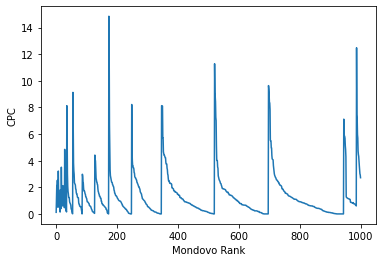

In [62]:
#correlation between CPC and Mondovo rank?
#by plotting the CPC we have the rank built into the graph already 
#from the graph there is an interesting spiking pattern but there does not 
#seem to be a positive or negative relation for the CPC based on rank. 
# The spikes in the values followed by the exponential decay of the following
#values until the next spike are curious. I wonder if this has to do with the 
#methodology of the data source's ranking system
plt.plot(df['Global CPC'])
plt.xlabel('Mondovo Rank')
plt.ylabel('CPC')
plt.show

In [63]:
#what is the avg "potential ad revenue" (GlobalSearch*CPC)
# here I am making the assumption that a search will imply a click 
print(df['ad_rev'].mean())

90501.408


<function matplotlib.pyplot.show(close=None, block=None)>

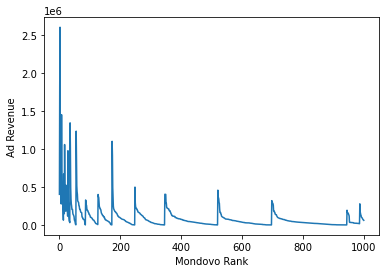

In [67]:
#correlation between rank and "ad revenue"?
#From the graph there is an obvious positive correlation between ad revenue and rank.
#even with the CPC spikes seen before, the shear numbers of the higer ranked questions 
#have produced more ad revenue.
plt.plot(df['ad_rev'])
plt.xlabel('Mondovo Rank')
plt.ylabel('Ad Revenue')
plt.show
#plt.savefig('C:/Users/mark1/CS-697AK Final Project/DataScienceProj_1/Mondrank_Adrev.svg')

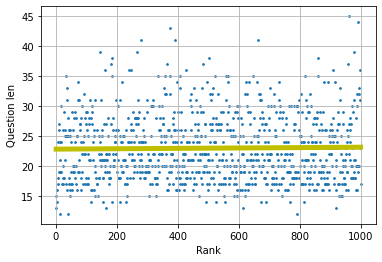

In [68]:
#correlation between question length and rank?
#from the graph of the fitting line, there seems to be no correlation between the 
#length of the question and the rank.

#store the length of each question
question_len = df['Questions'].apply(lambda x: len(x))

#used numpy polyfit method to obtain a line of best fit
m,b = np.polyfit(df['Rank'],question_len,1)

#plot each question by rank and question len
plt.scatter(df['Rank'],question_len, s = 3)

#plot the line of best fit
plt.plot(df['Rank'], m*df['Rank']+b,'y',linewidth = 5)

plt.xlabel('Rank')
plt.ylabel('Question len')
plt.grid()
plt.show()

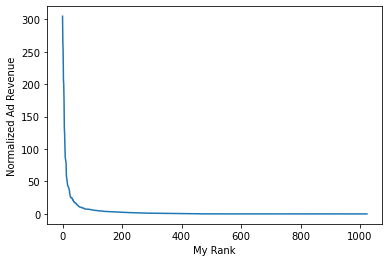

In [69]:
#graph my rank vs normalized ad rev
plt.plot(ranked_words['norm_ads'])
plt.xlabel('My Rank')
plt.ylabel('Normalized Ad Revenue')
plt.show()
#plt.savefig('C:/Users/mark1/CS-697AK Final Project/DataScienceProj_1/Myrank_Normad.svg')

In [70]:
#basic description of the numeric values in the derived dataframe
#shows the average potential ad revenue for a given single keyword
#also shows that the distribution of high earning words is very near the top percentiles

df2.describe()

,norm_ads
count,1024.000000
mean,4.129499
std,20.598448
min,0.000127
25%,0.016204
50%,0.064947
75%,1.566684
max,304.679867


In [72]:
#word cloud credit goes to https://github.com/kavgan/word_cloud
!pip install wordcloud
from wordcloud import WordCloud


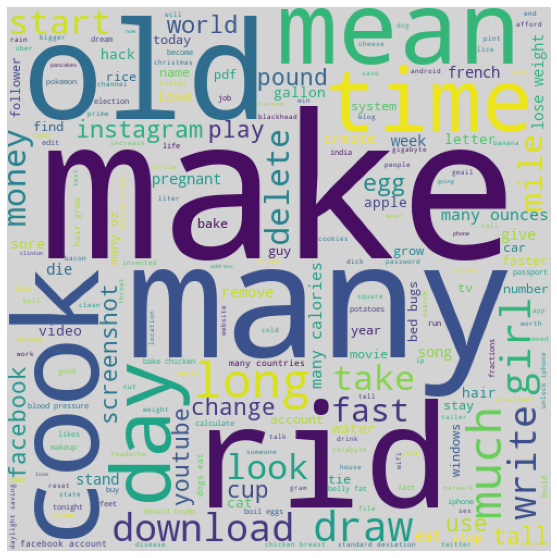

In [74]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='lightgrey', random_state=10).generate(wordcloud_string)
plot_cloud(wordcloud)
#plt.savefig('C:/Users/mark1/CS-697AK Final Project/DataScienceProj_1/word_cloud.svg')

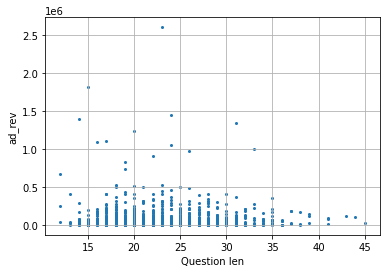

In [76]:
#plot each question by rank and question len
plt.scatter(question_len,df['ad_rev'], s = 4)


plt.ylabel('ad_rev')
plt.xlabel('Question len')
plt.grid()
plt.show()